In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

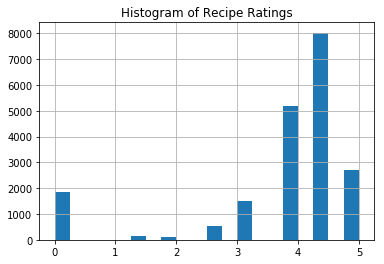

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [7]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating.sample(frac=0.3, replace=True, random_state=1)
#svr.fit(X,Y)

__Note that this actually takes quite a while to run, compared to some of the models we've done before. Around 5-7 mins. Be patient.__ It's because of the number of features we have.

Let's see what a scatter plot looks like, comparing actuals to predicted.

In [ ]:
plt.scatter(Y, svr.predict(X))

Now that is a pretty useless visualization. This is because of the discontinous nature of our outcome variable. There's too much data for us to really see what's going on here. If you wanted to look at it you could create histograms, here we'll move on to the scores of both our full fit model and with cross validation. Again if you choose to run it again it will take some time, so you probably shouldn't.

In [ ]:
svr.score(X, Y)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

In [13]:
# selectKbest for ideal features 
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

# Perform feature selection
selector = SelectKBest(f_classif, k=30)
selector.fit(X,Y)

X_new = selector.transform(X)
X_new.shape
print(selector.get_support(indices=True))

# Most 10  useful cols 
X_new = selector.transform(X)
print(X_new.shape)
# Col names 
X.columns[selector.get_support(indices=True)]

ValueError: Found input variables with inconsistent numbers of samples: [6016, 6017]

,3-ingredient recipes,alcoholic,bake,bitters,bon appétit,breadcrumbs,campari,chile pepper,cocktail,cocktail party,...,non-alcoholic,party,pasta,philippines,quick & easy,rum,sauce,sauté,sparkling wine,spirit
3-ingredient recipes,1.000000,-0.009425,-0.005468,-0.003924,-0.042233,-0.002309,-0.001913,-0.004709,-0.006324,-0.011195,...,-0.004672,-0.010420,0.024501,-0.000815,0.015368,-0.005693,-0.010908,-0.014533,-0.002945,-0.004487
alcoholic,-0.009425,1.000000,-0.109014,0.359650,-0.086977,-0.010887,0.087359,-0.022204,0.528408,0.572767,...,-0.022033,0.245139,-0.047701,-0.003845,-0.094851,0.314884,-0.051436,-0.068534,0.136757,0.434653
bake,-0.005468,-0.109014,1.000000,-0.046222,0.049368,0.035437,-0.022537,-0.051589,-0.074482,-0.054867,...,-0.055033,0.012225,-0.051712,-0.009603,-0.177280,-0.005922,-0.117970,-0.101242,-0.016253,-0.048794
bitters,-0.003924,0.359650,-0.046222,1.000000,-0.025583,-0.004533,-0.003757,-0.009245,0.455456,0.285745,...,-0.009174,0.031330,-0.019862,-0.001601,-0.048378,0.171559,-0.021417,-0.028536,0.081486,0.106413
bon appétit,-0.042233,-0.086977,0.049368,-0.025583,1.000000,-0.009990,0.014129,0.009194,-0.025564,-0.107974,...,-0.005322,-0.046976,0.021392,0.019304,-0.081257,-0.014007,0.000878,0.071174,-0.011477,-0.071359
breadcrumbs,-0.002309,-0.010887,0.035437,-0.004533,-0.009990,1.000000,-0.002210,-0.005439,-0.007304,-0.012932,...,-0.005397,-0.012036,0.033299,-0.000942,-0.016377,-0.006576,-0.012599,-0.016787,-0.003402,-0.005183
campari,-0.001913,0.087359,-0.022537,-0.003757,0.014129,-0.002210,1.000000,-0.004508,0.106179,0.038818,...,-0.004473,0.025224,-0.009684,-0.000781,-0.008063,-0.005450,-0.010442,-0.013913,-0.002820,0.074017
chile pepper,-0.004709,-0.022204,-0.051589,-0.009245,0.009194,-0.005439,-0.004508,1.000000,-0.014897,-0.019602,...,-0.011007,0.033197,-0.023831,-0.001921,0.016318,-0.013412,0.085180,-0.001673,-0.006939,-0.010571
cocktail,-0.006324,0.528408,-0.074482,0.455456,-0.025564,-0.007304,0.106179,-0.014897,1.000000,0.356271,...,-0.014783,0.102584,-0.032004,-0.002579,-0.060477,0.115908,-0.034510,-0.045982,0.155140,0.082309
cocktail party,-0.011195,0.572767,-0.054867,0.285745,-0.107974,-0.012932,0.038818,-0.019602,0.356271,1.000000,...,0.021592,0.286238,-0.056662,-0.004567,-0.052845,0.176393,-0.054972,-0.057415,0.080283,0.308516


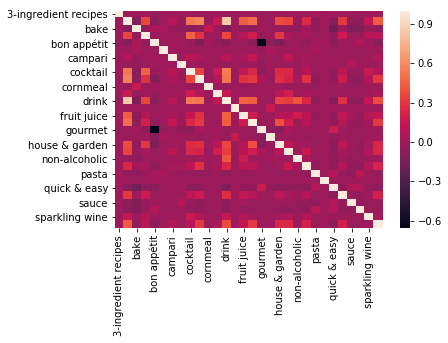

In [18]:
#features = X.columns[selector.get_support(indices=True)]

features = X[['3-ingredient recipes', 'alcoholic', 'bake', 'bitters', 'bon appétit',
      'breadcrumbs', 'campari', 'chile pepper', 'cocktail', 'cocktail party',
      'cornmeal', 'créme de cacao', 'drink', 'egypt', 'fruit juice', 'gin',
      'gourmet', 'harpercollins', 'house & garden', 'liqueur',
        'non-alcoholic', 'party', 'pasta', 'philippines', 'quick & easy', 'rum',
       'sauce', 'sauté', 'sparkling wine', 'spirit']]

features2 = X[['alcoholic', 'bake', 'bitters', 'bon appétit', 'cocktail',
       'cocktail party', 'drink', 'egypt', 'gin', 'gourmet', 'harpercollins',
       'house & garden', 'liqueur', 'sauté', 'spirit']]

correlation_matrix = features.corr()
display(correlation_matrix)



import seaborn as sns
ax = sns.heatmap(correlation_matrix)

In [11]:
# Create condition for classifier 
Y['Rating_conditon'] = Y.apply(lambda x: 1 if x > 4 else 0)


In [25]:
from sklearn.svm import SVC

# Instantiate our model and fit the data.
svm = SVC(kernel = 'linear')
svm.fit(features, Y['Rating_conditon'])


#Training and splitting 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, Y['Rating_conditon'], test_size=0.1, random_state=150)



# Train and test results 
print('With 10% Holdout: ' + str(svm.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(svm.fit(features, Y['Rating_conditon']).score(features, Y['Rating_conditon'])))

# cross VALIDATION 
from sklearn.model_selection import cross_val_score
print(cross_val_score(svm, features, Y['Rating_conditon'], cv=10))

#Classification report 
from sklearn.metrics import classification_report
print('SVM Classification Report:')
print(classification_report(y_test, svm.predict(X_test)))


With 10% Holdout: 0.5581395348837209
Testing on Sample: 0.5762965425531915
[0.5854063  0.57048093 0.5730897  0.57641196 0.58402662 0.58735441
 0.57237937 0.57237937 0.56073211 0.5640599 ]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.18      0.29       290
           1       0.55      0.91      0.68       312

   micro avg       0.56      0.56      0.56       602
   macro avg       0.60      0.55      0.48       602
weighted avg       0.60      0.56      0.49       602



In [26]:
# attempts at improving the model 
# Using next feature set
from sklearn.svm import SVC

# Instantiate our model and fit the data.
svm = SVC(kernel = 'linear')
svm.fit(features2, Y['Rating_conditon'])


#Training

# Cross validation with 20% holdout group 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features2, Y['Rating_conditon'], test_size=0.2, random_state=150)

# cross VALIDATION 
from sklearn.model_selection import cross_val_score
cross_val_score(svm, features2, Y['Rating_conditon'], cv=10)

# Train and test results 
print('With 20% Holdout: ' + str(svm.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(svm.fit(features2, Y['Rating_conditon']).score(features2, Y['Rating_conditon'])))



#Classification report 
from sklearn.metrics import classification_report
print('SVM Classification Report:')
print(classification_report(y_test, svm.predict(X_test)))


With 20% Holdout: 0.5481727574750831
Testing on Sample: 0.5625
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.10      0.18       580
           1       0.54      0.96      0.69       624

   micro avg       0.55      0.55      0.55      1204
   macro avg       0.63      0.53      0.43      1204
weighted avg       0.63      0.55      0.44      1204

